In [1]:
import os
from env import host, user, password
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import explore_telco as et

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

    
################### Create new dataframe from SQL db ###################
    
def new_mall_cust_data():
    '''
    This function reads the telco data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''

    # Create SQL query.
    sql_query = """
            SELECT *
            FROM customers;
                """
    
    # Read in DataFrame from Codeup's SQL db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    
    return df


################### Acquire existing csv file ###################

def get_mall_cust_data():
    '''
    This function reads in mall_customers data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('mall_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('mall_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_mall_cust_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('mall_df.csv')
        
    return df

In [3]:
df = get_mall_cust_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [6]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

customer_id: 200
gender: 2
age: 51
annual_income: 64
spending_score: 84


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [8]:
df.drop(columns='customer_id', inplace=True)
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df = pd.get_dummies(data = df, columns=['gender'])

cats = ['gender_Female', 'gender_Male']
df.replace({'gender_Female': {1: 'Yes', 0: 'No'},
                 'gender_Male': {1: 'Yes', 0: 'No'}}, inplace=True)

In [10]:
quants = ['age','annual_income','spending_score']
cats = ['gender_Female', 'gender_Male']

In [11]:
df.head()

,age,annual_income,spending_score,gender_Female,gender_Male
0,19,15,39,No,Yes
1,21,15,81,No,Yes
2,20,16,6,Yes,No
3,23,16,77,Yes,No
4,31,17,40,Yes,No


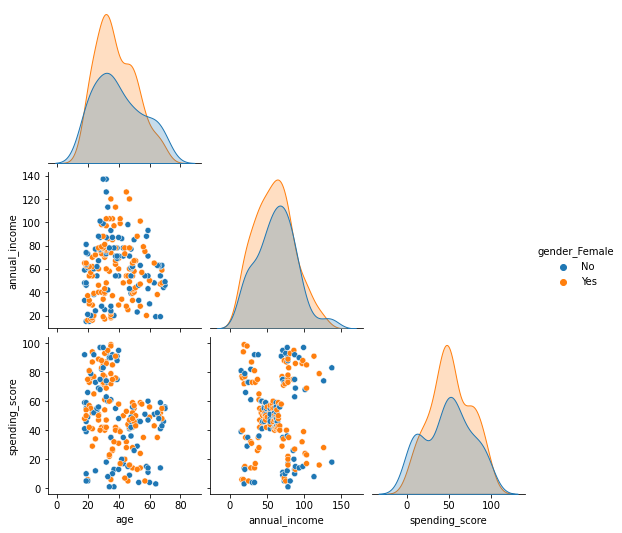

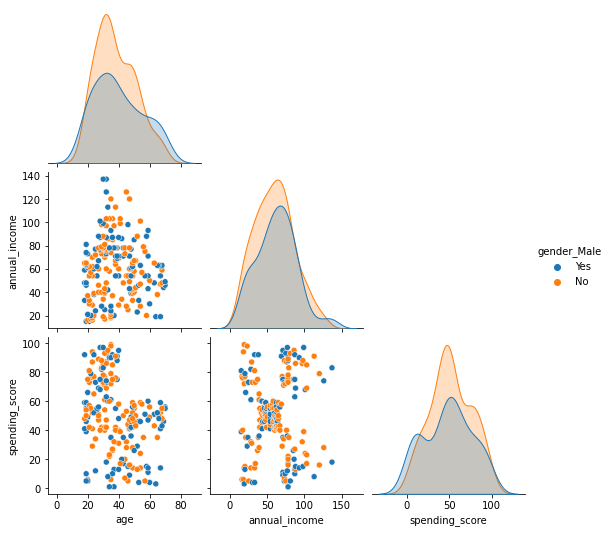

In [12]:
et.plot_variable_pairs(df)

-------------------------------------------------
age
-------------------------------------------------
vs. gender_Female
---------------


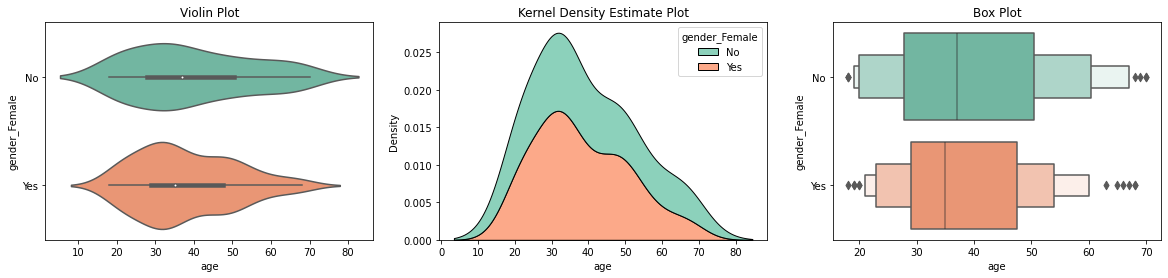

vs. gender_Male
---------------


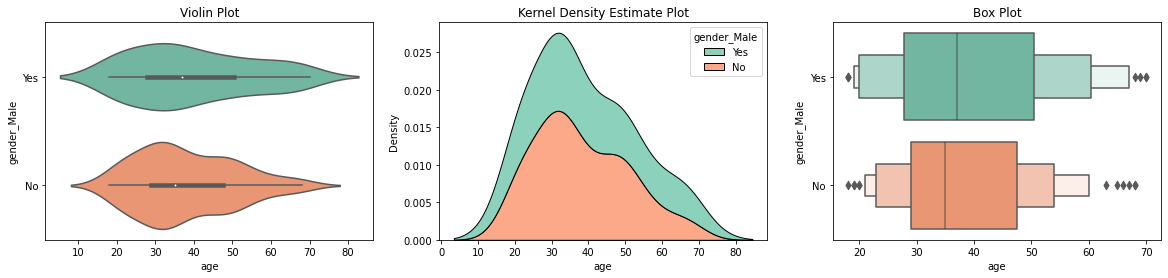

-------------------------------------------------
annual_income
-------------------------------------------------
vs. gender_Female
---------------


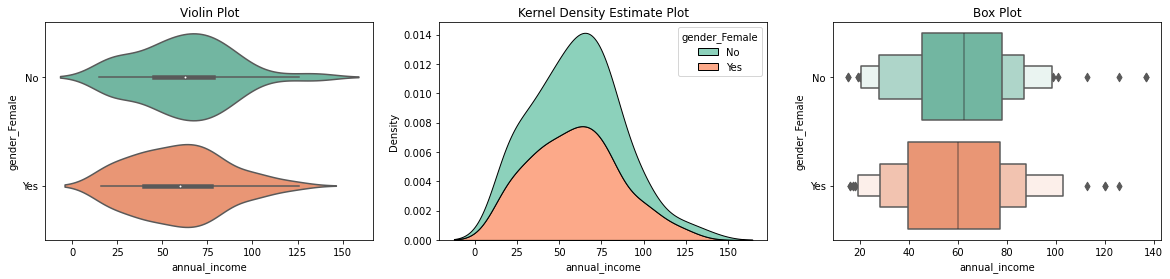

vs. gender_Male
---------------


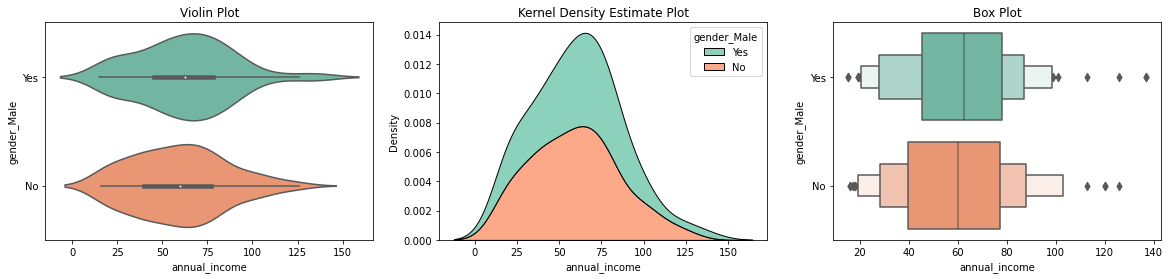

-------------------------------------------------
spending_score
-------------------------------------------------
vs. gender_Female
---------------


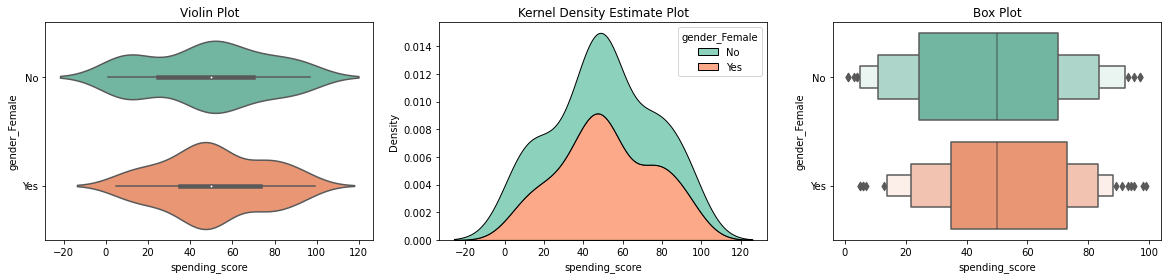

vs. gender_Male
---------------


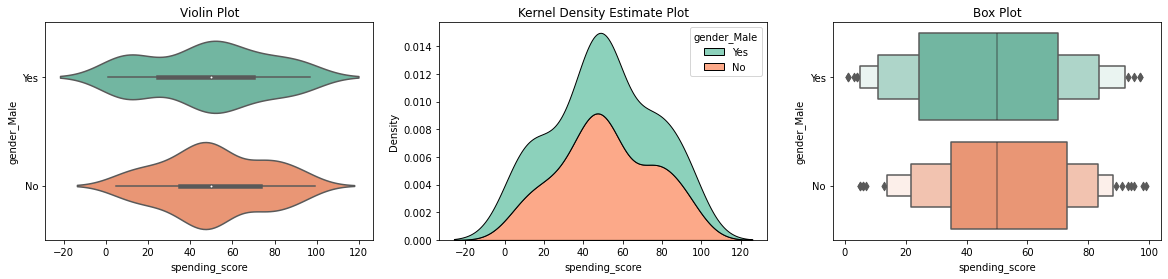

In [13]:
et.plot_categorical_and_continuous_vars(df, cats, quants)